# Fiducial Corner Finder
This script automates the location of aerial photo fiducial points. Currently, it is only designed to work with fiducials that include a sharp corner as their index point.

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

## Loading imagery

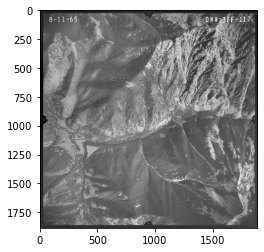

In [2]:
photo_path = os.path.join("data", "DWW_3FF_117.tif")
img = cv2.imread(photo_path, 0)

plt.imshow(img, cmap="gray")
plt.show()

## Utility Functions

In [3]:
def locate_fiducial_corner(img, quality=0.1):
    """
    Take a filtered image of a fiducial and find the best corner feature. Return it's pixel coordinates.
    """
    corner = cv2.goodFeaturesToTrack(img, maxCorners=1, qualityLevel=quality, minDistance=0)
    return (corner[0][0][0], corner[0][0][1])

In [4]:
TOP = 0
RIGHT = 1
BOTTOM = 2
LEFT = 3


def extract_fiducial(img, height, width, position):
    """
    Calculate the coordinates of and crop a fiducial marker from an image
    """
    # Rotate the image to align the fiducial at the top
    img = np.rot90(img, position)
    
    img_width = img.shape[0]

    top = 0
    bottom = height
    left = img_width // 2 - width // 2
    right = img_width // 2 + width // 2

    crop = img[top:bottom, left:right]
    
    # Undo the image rotation
    crop = np.rot90(crop, 4 - position)
    
    return crop

In [5]:
def filter_fiducial(img, kernel_size=img.shape[0] // 200, iterations=4, threshold=False, block_size=999):
    """
    Use morphological opening and adaptive thresholding to filter an image of a fiducial to prepare for corner detection.
    """
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    
    filtered = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=iterations)
    
    if threshold:
        filtered = cv2.adaptiveThreshold(filtered, img.max(), cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, 0)
        
    return filtered

## Locating Fiducial Points

In [6]:
fid_top = extract_fiducial(img, 75, 75, TOP)
fid_filter_top = filter_fiducial(fid_top)
corner_top = locate_fiducial_corner(fid_filter_top)

fid_right = extract_fiducial(img, 75, 75, RIGHT)
fid_filter_right = filter_fiducial(fid_right)
corner_right = locate_fiducial_corner(fid_filter_right)

fid_bottom = extract_fiducial(img, 75, 75, BOTTOM)
fid_filter_bottom = filter_fiducial(fid_bottom)
corner_bottom = locate_fiducial_corner(fid_filter_bottom)

fid_left = extract_fiducial(img, 75, 75, LEFT)
fid_filter_left = filter_fiducial(fid_left)
corner_left = locate_fiducial_corner(fid_filter_left)

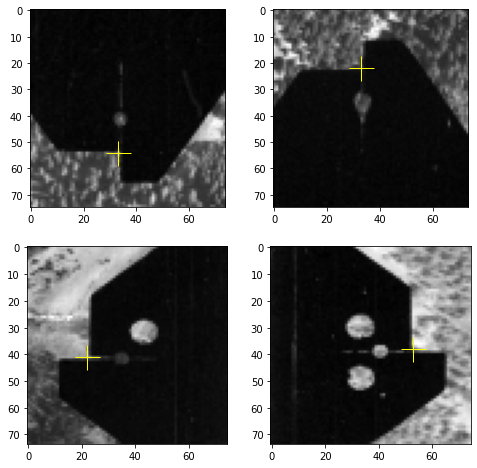

In [8]:
_, axarr = plt.subplots(2, 2, figsize=(8, 8))

axarr[0][0].imshow(fid_top, cmap="gray")
axarr[0][0].plot(corner_top[0], corner_top[1], marker="+", color="yellow", markersize=25)

axarr[1][0].imshow(fid_right, cmap="gray")
axarr[1][0].plot(corner_right[0], corner_right[1], marker="+", color="yellow", markersize=25)

axarr[0][1].imshow(fid_bottom, cmap="gray")
axarr[0][1].plot(corner_bottom[0], corner_bottom[1], marker="+", color="yellow", markersize=25)

axarr[1][1].imshow(fid_left, cmap="gray")
axarr[1][1].plot(corner_left[0], corner_left[1], marker="+", color="yellow", markersize=25)


plt.show()

### TODO
- Create a wrapper function that identifies all fiducials in the original image coordinates
- Handle errors if no corners are found
- Output data for Agisoft